In [209]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors

# Plot decision boundary

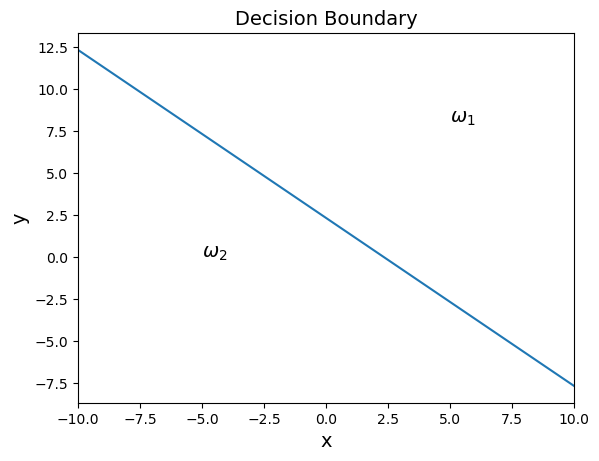

In [210]:
x = np.arange(-10, 11, 1)
y = 2+0.5*np.log(2)-x
plt.plot(x, y)
plt.title('Decision Boundary', fontsize=14)
plt.text(5, 8, r'$\omega_1$', fontsize=14)
plt.text(-5, 0, r'$\omega_2$', fontsize=14)
plt.xlim(-10, 10)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.savefig('db.png', dpi=100)
plt.show()

# Sample the posterior

In [391]:
N = 1000
u = np.random.uniform(size=N)
ws = np.zeros_like(u)
ind = u>2/3
ws[ind] = 1

In [392]:
xs = []
ys = []
for w in ws:
    if w==1:
        # mean=2
        x,y = np.random.randn(2) + 2
        xs.append(x)
        ys.append(y)
    else:
        # mean=0
        x,y = np.random.randn(2)
        xs.append(x)
        ys.append(y)
xs = np.array(xs)
ys = np.array(ys)

In [393]:
xs.shape

(1000,)

In [394]:
#TODO 没有归一化
h = 3
ps = []
for i in range(N):
    x = xs[i]
    y = ys[i]
    d = np.sqrt((xs/h - x/h)**2 + (ys/h - y/h)**2)
    if np.any(d==1/2):
        print(np.sum(d==1/2))
    # print(np.sum(d<1/2))
    p = np.sum(d < 1/2)/N/(h**2)
    ps.append(p)
ps = np.array(ps)
print(np.sum(ps))

28.88533333333333


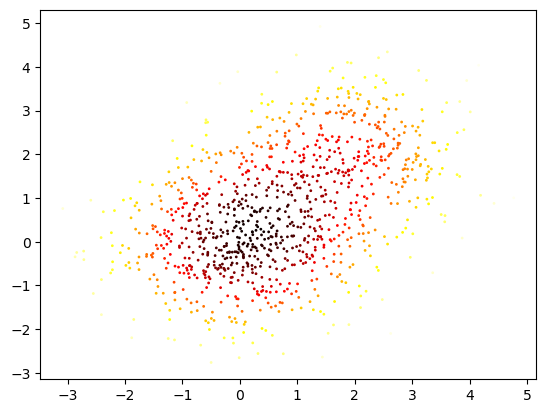

In [395]:
plt.scatter(xs, ys, c=ps, cmap='hot_r', s=1)
plt.show()

In [420]:
lim = 5
step = 0.02
x_grid = np.arange(-lim, lim+step, step)
y_grid = np.arange(-lim, lim+step, step)
x_grid.shape

(501,)

In [421]:
ps_grid = []
for i in range(x_grid.shape[0]):
    if i==x_grid.shape[0]-1:
        ind_x = ((xs>x_grid[i]) + (xs==x_grid[i]))*((xs<x_grid[i]+step)+(xs==x_grid[i]+step))
    else:
        ind_x = ((xs>x_grid[i]) + (xs==x_grid[i]))*((xs<x_grid[i+1])+(xs==x_grid[i+1]))
    for j in range(y_grid.shape[0]):
        if j==y_grid.shape[0]-1:
            ind_y = ((ys>y_grid[j]) + (ys==y_grid[j]))*((ys<y_grid[j]+step)+(ys==y_grid[j]+step))
        else:
            ind_y = ((ys>y_grid[j]) + (ys==y_grid[j]))*((ys<y_grid[j+1])+(ys==y_grid[j+1]))
        
        ind = ind_x*ind_y
        if np.sum(ind)==0:
            p_grid = 0
        elif np.sum(ind)==1:
            p_grid = ps[ind][0] * step**2
        else:
            p_grid = np.mean(ps[ind]) * step**2
        ps_grid.append(p_grid)

In [422]:
ps_grid = np.array(ps_grid)
print(ps_grid.shape)
ps_grid = ps_grid.reshape(x_grid.shape[0], y_grid.shape[0])
print(ps_grid.shape)

(251001,)
(501, 501)


In [423]:
np.sum(ps_grid)

0.011421822222222225

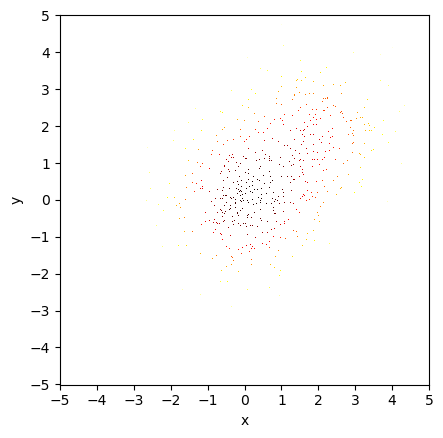

In [424]:
fig, ax = plt.subplots()
ax.pcolormesh(x_grid, y_grid, ps_grid, cmap='hot_r')
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-5, 6, 1))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
plt.show()

In [425]:
f = 1/2*np.pi * (1/3*(np.exp(-((xs-2)**2 + (ys-2)**2)/2)) + 2/3*(np.exp(-(xs**2+ys**2)/2)))
np.sum(f)

458.4571190380171

In [426]:
ps

array([0.02355556, 0.02122222, 0.00311111, 0.02233333, 0.04211111,
       0.02955556, 0.01788889, 0.04566667, 0.039     , 0.04444444,
       0.02777778, 0.01788889, 0.02844444, 0.033     , 0.02166667,
       0.02444444, 0.03244444, 0.03022222, 0.01622222, 0.02666667,
       0.02322222, 0.01866667, 0.02833333, 0.009     , 0.033     ,
       0.04466667, 0.04766667, 0.04488889, 0.00388889, 0.03566667,
       0.027     , 0.03455556, 0.01411111, 0.03955556, 0.04388889,
       0.00722222, 0.01611111, 0.01077778, 0.03533333, 0.04377778,
       0.013     , 0.04533333, 0.02255556, 0.01422222, 0.027     ,
       0.04055556, 0.03944444, 0.03522222, 0.03433333, 0.01655556,
       0.02011111, 0.01533333, 0.01977778, 0.021     , 0.03066667,
       0.02922222, 0.02766667, 0.03455556, 0.00666667, 0.04      ,
       0.02488889, 0.03833333, 0.04755556, 0.03088889, 0.016     ,
       0.04688889, 0.02533333, 0.04677778, 0.00433333, 0.04566667,
       0.02444444, 0.02266667, 0.04766667, 0.03555556, 0.02344

In [427]:
f

array([0.38762092, 0.28009334, 0.01147813, 0.29702896, 0.73533439,
       0.42922667, 0.26548334, 0.9894677 , 0.53153202, 0.8432527 ,
       0.36772271, 0.13598792, 0.44432359, 0.57484104, 0.17156237,
       0.36713966, 0.44271686, 0.40999334, 0.20438555, 0.32838935,
       0.35522316, 0.25769827, 0.49508329, 0.06709922, 0.56316805,
       0.88593585, 1.0453874 , 0.88251524, 0.01420018, 0.65555006,
       0.28890912, 0.62342359, 0.14363682, 0.78483381, 0.91928448,
       0.03807352, 0.1440647 , 0.1095368 , 0.59795012, 1.0069134 ,
       0.130647  , 1.02546593, 0.26893826, 0.16232401, 0.38378801,
       0.54585815, 0.54695736, 0.47224012, 0.48532511, 0.1892178 ,
       0.29736013, 0.13907973, 0.17321259, 0.33762582, 0.37486477,
       0.4625308 , 0.48158357, 0.47962622, 0.04195412, 0.83783577,
       0.40455376, 0.54967438, 1.01906033, 0.48129323, 0.17456139,
       0.96249486, 0.34783338, 0.95985877, 0.01604258, 1.03850403,
       0.25901091, 0.27401065, 0.99584733, 0.46523301, 0.27900